In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("../data/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset (1).csv")


# Proyecto de Análisis de Salud

En este notebook se realiza el análisis exploratorio del conjunto de datos
**“Lifestyle and Health Risk Prediction”**, con el objetivo de estudiar cómo
los hábitos de vida se relacionan con distintos indicadores de salud y niveles
de riesgo.


## 1. Carga e inspección inicial de los datos

En esta sección se realiza la carga del conjunto de datos y una primera
inspección para conocer su tamaño, los tipos de variables y demas datos que se necesiten



### 1.1 Primeras filas del dataset

In [29]:
df = pd.read_csv("../data/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset (1).csv")

df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


### 1.2 Tamaño del conjunto de datos

In [30]:
df.shape

(5000, 12)

La base de datos tiene un total de 5000 filas y 12 variables

### 1.3 Tipo de variables de la base de datos

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


### 1.4 Descripción estadistica de varibles numéricas

In [32]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,5000.0,48.80560,17.906991,18.0,34.0,49.0,64.0,79.0
weight,5000.0,77.35920,18.714567,45.0,61.0,77.0,94.0,109.0
height,5000.0,171.93320,15.822225,145.0,158.0,171.5,186.0,199.0
sleep,5000.0,6.99706,1.432849,3.0,6.0,7.0,8.0,10.0
bmi,5000.0,26.84388,8.252490,11.4,20.3,26.0,32.4,51.4


In [33]:
df.select_dtypes(include="object").describe().T


,count,unique,top,freq
exercise,5000,4,medium,1985
sugar_intake,5000,3,medium,2511
smoking,5000,2,no,4023
alcohol,5000,2,no,3741
married,5000,2,yes,3018
profession,5000,8,student,644
health_risk,5000,2,high,3490


A partir de estas salidas se observa el tamaño total de la base de datos,
los tipos de variables (numéricas y categóricas) y el rango general de los
valores. Esto sirve como punto de partida para el análisis posterior.


## 2. Manejo de datos faltantes

Aquí se identifican los valores faltantes presentes en el dataset y se analiza
su distribución mediante tablas y un mapa de calor. Con base en esto se decide
si es necesario eliminar registros o imputar valores.


### 2.1 Conteo y porcentaje valores faltantes por columna

In [34]:
# Conteo
df.isnull().sum()

age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64

In [35]:
# Porcentaje
(df.isnull().sum() / len(df)) * 100

age             0.0
weight          0.0
height          0.0
exercise        0.0
sleep           0.0
sugar_intake    0.0
smoking         0.0
alcohol         0.0
married         0.0
profession      0.0
bmi             0.0
health_risk     0.0
dtype: float64

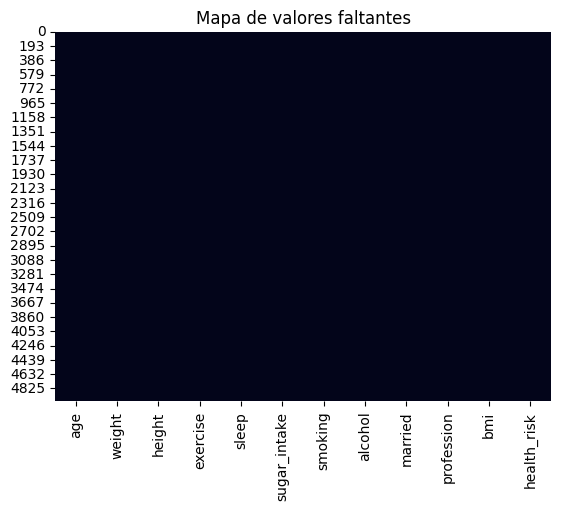

In [36]:
# Mapa de Calor
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()


En la tabla y el mapa de calor se observa que la base de datos presenta un
porcentaje ninguno en sus variables.
Dado que la ausencia de datos no es significativa, se decide continuar el
análisis sin aplicar técnicas de imputación y manteniendo el conjunto de
datos completo.


## 3. Identificación de outliers



### 3.1 Seleccion de variables numéricas relevantes

In [37]:
vn = ["age", "weight", "height", "sleep", "bmi"]
df[vn].head()


,age,weight,height,sleep,bmi
0,56,67,195,6.1,17.6
1,69,76,170,6.9,26.3
2,46,106,153,6.6,45.3
3,32,54,186,8.5,15.6
4,60,98,195,8.0,25.8


### 3.2 Boxplots por variable numérica

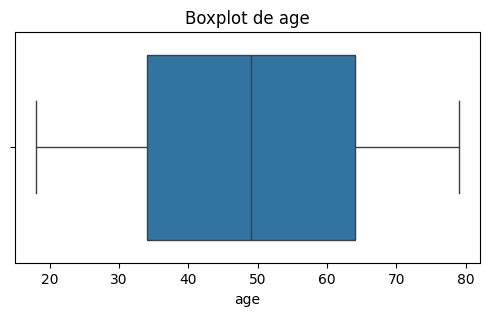

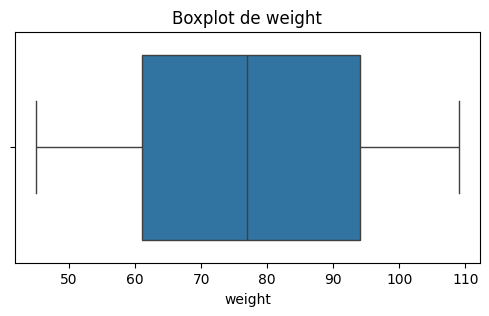

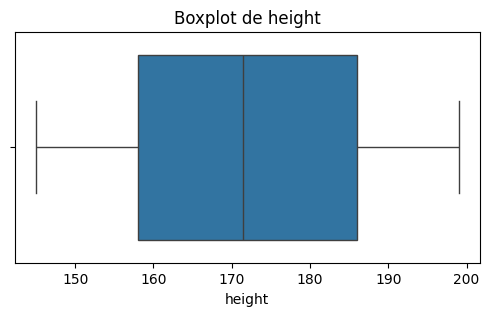

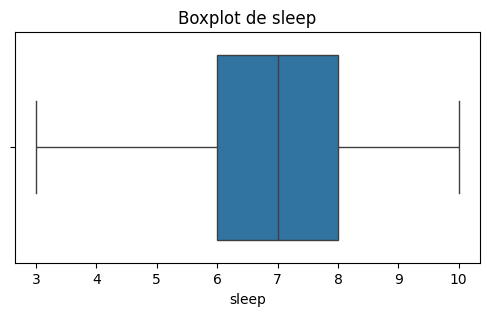

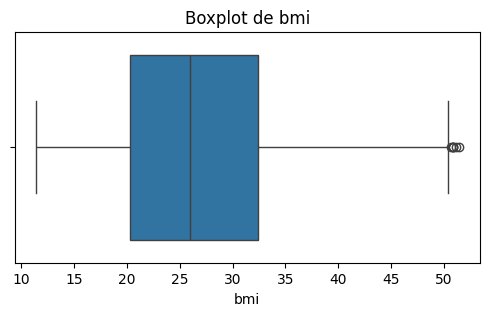

In [38]:
for col in vn:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()


In [39]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

li = Q1 - 1.5 * IQR
ls = Q3 + 1.5 * IQR

outliers_bmi = df[(df["bmi"] < li) | (df["bmi"] > ls)]
outliers_bmi.head()


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
544,40,107,145,high,7.3,high,no,no,no,office_worker,50.9,high
2814,64,107,145,low,8.2,medium,no,no,no,engineer,50.9,high
3153,30,109,146,medium,6.5,medium,no,no,yes,student,51.1,low
3964,78,107,145,medium,7.6,medium,no,yes,yes,doctor,50.9,high
4708,40,108,145,low,7.5,high,no,no,yes,doctor,51.4,high


A partir de los boxplots se observan posibles valores atípicos en algunas
variables numéricas, especialmente en el índice de masa corporal (BMI) y en la
edad. Estos casos extremos pueden corresponder a individuos con condiciones de
salud particulares y se tendrán en cuenta al interpretar las estadísticas y las
agrupaciones posteriores.


## 4 .Tratamiento de duplicados e inconsistencias de texto

In [40]:
print("CANTIDAD DE FILAS DUPLICADAS:")
print(df.duplicated().sum())

CANTIDAD DE FILAS DUPLICADAS:
0


In [41]:
print(" REVISIÓN DE VALORES ÚNICOS \n")

columnas_texto = ["smoking", "alcohol", "married", "profession", "health_risk"]

for col in columnas_texto:
    print(f"Valores únicos en {col}:")
    print(df[col].unique())
    print("\n")
print("no hay inconsistencias de texto ")    

 REVISIÓN DE VALORES ÚNICOS 

Valores únicos en smoking:
['yes' 'no']


Valores únicos en alcohol:
['yes' 'no']


Valores únicos en married:
['yes' 'no']


Valores únicos en profession:
['office_worker' 'teacher' 'artist' 'farmer' 'driver' 'engineer' 'student'
 'doctor']


Valores únicos en health_risk:
['high' 'low']


no hay inconsistencias de texto 


## 5. Nuevas variables

In [42]:
#  VARIABLE NUEVA 1: CATEGORÍA DE BMI 
def clasificar_bmi(valor):
    if valor < 18.5:
        return "underweight"
    elif valor < 25:
        return "normal"
    elif valor < 30:
        return "overweight"
    else:
        return "obese"

df["bmi_category"] = df["bmi"].apply(clasificar_bmi)


#  VARIABLE NUEVA 2: CALIDAD DE SUEÑO 
def calidad_sueno(horas):
    if horas < 6:
        return "bad"
    elif horas <= 8:
        return "regular"
    else:
        return "good"

df["sleep_quality"] = df["sleep"].apply(calidad_sueno)



In [43]:
df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,bmi_category,sleep_quality
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high,underweight,regular
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high,overweight,regular
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high,obese,regular
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low,underweight,good
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high,overweight,regular


## 6. Filtrado y condiciones en Pandas

In [44]:
df[df["bmi"] > 30].head() 

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,bmi_category,sleep_quality
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high,obese,regular
5,25,96,160,medium,3.8,medium,no,no,yes,farmer,37.5,high,obese,bad
9,75,94,147,none,8.1,medium,yes,no,no,farmer,43.5,high,obese,good
11,40,97,177,high,6.9,low,yes,no,yes,engineer,31.0,high,obese,regular
14,41,74,153,low,6.0,medium,no,no,no,teacher,31.6,high,obese,regular


Descripcion: Una gran cantidad de personas tienen IMC alto en este caso mayor a 30 coincide con la variable de de health_risk = high, lo que indica que podria haber alguna relacion entre entre las variables bmi y health_risk.

In [45]:
df[(df["exercise"] == "high") & (df["health_risk"] == "high")].head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,bmi_category,sleep_quality
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high,overweight,regular
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high,obese,regular
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high,overweight,regular
10,36,72,178,high,7.4,low,yes,yes,no,office_worker,22.7,high,normal,regular
11,40,97,177,high,6.9,low,yes,no,yes,engineer,31.0,high,obese,regular


Descripcion: El ejercicio por sí solo no determina el riesgo de salud hay factores mas importantes como lo son el azucar, el peso, el tabaco

In [46]:
df[df["sleep"] < 6].head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,bmi_category,sleep_quality
5,25,96,160,medium,3.8,medium,no,no,yes,farmer,37.5,high,obese,bad
32,75,108,181,none,5.0,low,yes,no,yes,engineer,33.0,high,obese,bad
37,66,63,146,low,5.5,high,yes,no,yes,teacher,29.6,high,overweight,bad
38,44,53,163,none,5.7,medium,no,no,yes,artist,19.9,low,normal,bad
40,59,78,164,medium,5.8,medium,no,yes,no,doctor,29.0,high,overweight,bad


Descripcion: Se demuestra que el poco tiempo de sueño es un factor importante para que el riesgo de salud aumente 

In [47]:
df[(df["smoking"]=="yes") & (df["alcohol"]=="yes") & (df["health_risk"]=="high")].head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,bmi_category,sleep_quality
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high,underweight,regular
10,36,72,178,high,7.4,low,yes,yes,no,office_worker,22.7,high,normal,regular
26,55,82,176,low,8.2,medium,yes,yes,yes,engineer,26.5,high,overweight,good
62,21,55,189,medium,5.2,high,yes,yes,yes,student,15.4,high,underweight,bad
74,64,91,176,none,7.1,medium,yes,yes,yes,student,29.4,high,overweight,regular


Descripcion: Se muetsra el filtrado de las personas que fuman, toman alcohol, y se vuelve a comparar con el riesgo de salud alto

In [48]:
df[(df["profession"]=="office_worker") & (df["sugar_intake"]=="high")].head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,bmi_category,sleep_quality
33,39,73,153,none,7.2,high,no,no,yes,office_worker,31.2,high,obese,regular
78,78,75,199,medium,6.7,high,no,no,yes,office_worker,18.9,high,normal,regular
131,18,91,169,none,5.9,high,no,no,yes,office_worker,31.9,high,obese,bad
153,45,76,192,none,8.8,high,no,no,no,office_worker,20.6,low,normal,good
181,72,109,194,high,6.1,high,no,no,yes,office_worker,29.0,high,overweight,regular


Descripcion: Se escogen las personas que trabajan en oficina y que al mismo tiempo hay un alto consumo de azucar, malos habitos y el respectivo riesgo de salud

## 7. Agrupacion con groupby

In [49]:
df.groupby("exercise")["bmi"].mean()

exercise
high      26.573900
low       26.842138
medium    26.884282
none      27.102288
Name: bmi, dtype: float64

Descripcion: En que promedio las personas con IMC realizan ejercicio. Entendiendo que las personas que hacen mas ejercicio tienen menos IMC y las que hacen menos ejercicio tienen mayor IMC

In [50]:
df.groupby("profession")["health_risk"].value_counts()

profession     health_risk
artist         high           430
               low            196
doctor         high           419
               low            211
driver         high           457
               low            174
engineer       high           437
               low            179
farmer         high           442
               low            197
office_worker  high           421
               low            181
student        high           451
               low            193
teacher        high           433
               low            179
Name: count, dtype: int64

Descripcion: Muestra el riesgo de salud bajo, medio y alto dependiendo de la profesion

In [51]:
df.groupby("married")["sleep"].mean()

married
no     7.035217
yes    6.972001
Name: sleep, dtype: float64

Descripcion: Agrupamiento entre las personas que estan casadas y promedio en horas de sueño. Las personas casadas suelen tener menor promedio de sueño

In [52]:
df["risk_num"] = 0

df.loc[df["health_risk"] == "low", "risk_num"] = 1
df.loc[df["health_risk"] == "medium", "risk_num"] = 2
df.loc[df["health_risk"] == "high", "risk_num"] = 3

Descripcion: Se crea una nueva variable risk_num para asignarle a cada nivel de riesgo de salud un numero

In [53]:
df.groupby("smoking")["risk_num"].mean()

smoking
no     2.281631
yes    2.866940
Name: risk_num, dtype: float64

Deescripcion: Segun la nueva variable las personas que fuman tienen un promedio mayor de riesgo

## 8. Graficos

### 8.1. Distribución del ejercicio


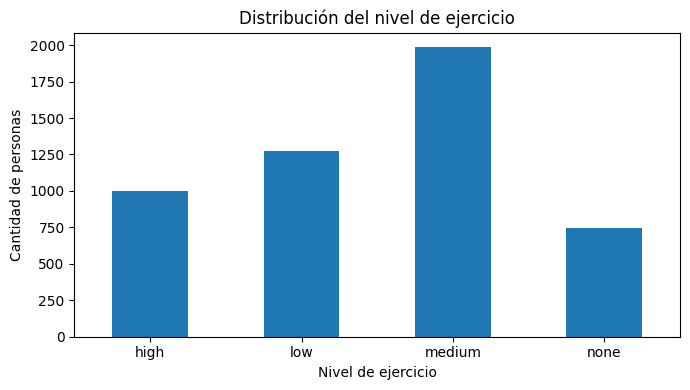

In [58]:
plt.figure(figsize=(7,4))

df['exercise'].value_counts().sort_index().plot(kind='bar')

plt.title('Distribución del nivel de ejercicio')
plt.xlabel('Nivel de ejercicio')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


La mayoría de personas tiene niveles de ejercicio bajos o medios lo que ya muestra que en general no hay un estilo de vida muy activo

### 8.2. Fumar vs riesgo

<Figure size 700x400 with 0 Axes>

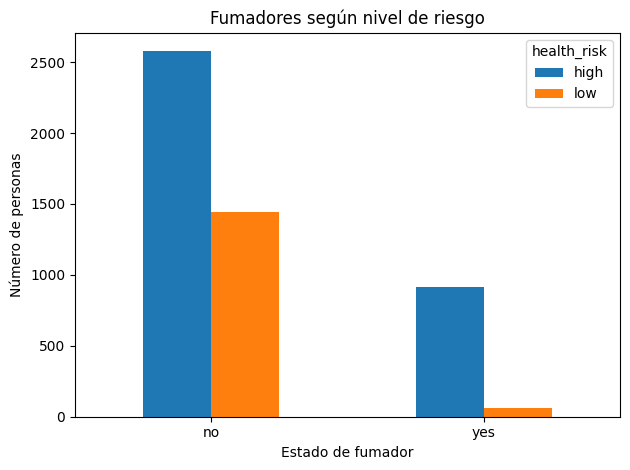

In [59]:
tabla_fumar = pd.crosstab(df['smoking'], df['health_risk'])

plt.figure(figsize=(7,4))
tabla_fumar.plot(kind='bar')

plt.title('Fumadores según nivel de riesgo')
plt.xlabel('Estado de fumador')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Los fumadores aparecen con más frecuencia en niveles de riesgo altos lo que muestra que fumar afecta el estado de salud

### 8.3. Alcohol vs riesgo

<Figure size 700x400 with 0 Axes>

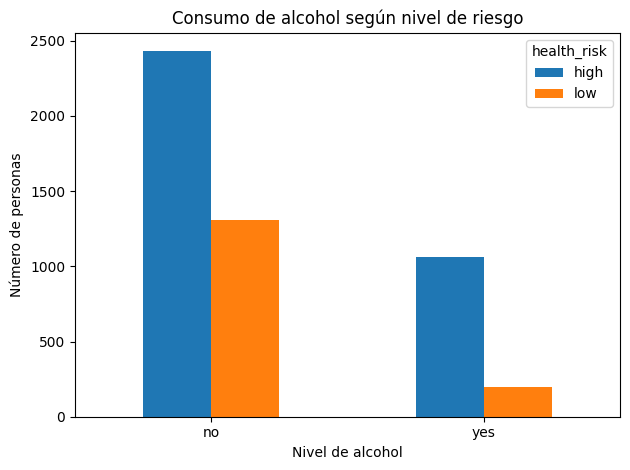

In [60]:
tabla_alcohol = pd.crosstab(df['alcohol'], df['health_risk'])

plt.figure(figsize=(7,4))
tabla_alcohol.plot(kind='bar')

plt.title('Consumo de alcohol según nivel de riesgo')
plt.xlabel('Nivel de alcohol')
plt.ylabel('Número de personas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


A mayor consumo de alcohol se ve más gente con riesgo medio y alto lo que indica que este hábito también influye negativamente

### 8.4. IMC vs riesgo

<Figure size 700x400 with 0 Axes>

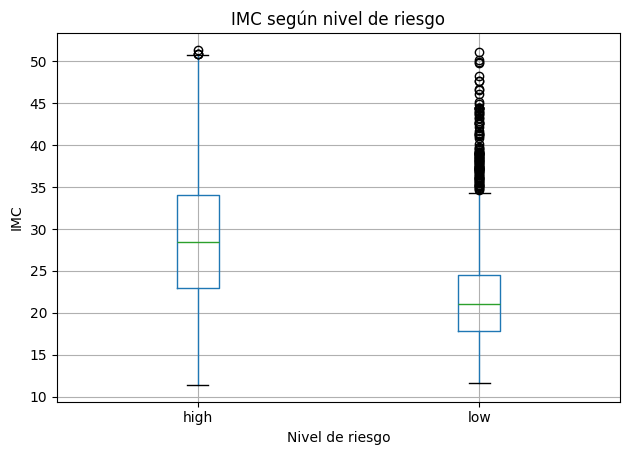

In [61]:
plt.figure(figsize=(7,4))

df.boxplot(column='bmi', by='health_risk')

plt.title('IMC según nivel de riesgo')
plt.suptitle('')  # Quita el título extra
plt.xlabel('Nivel de riesgo')
plt.ylabel('IMC')
plt.tight_layout()
plt.show()


Las personas con riesgo alto tienen IMC más altos y más dispersos lo que sugiere que el peso corporal está relacionado con el riesgo de salud

### 8.5. Sueño vs riesgo

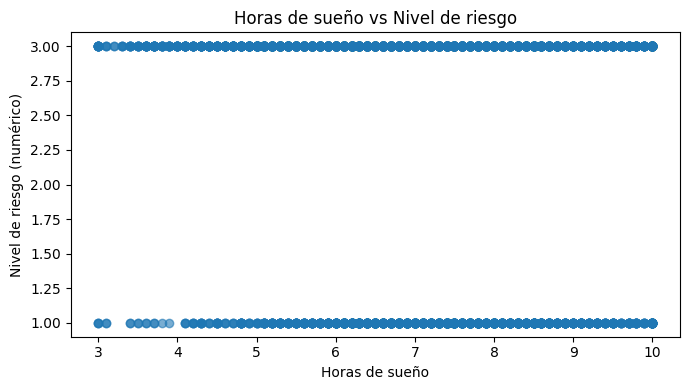

In [62]:
plt.figure(figsize=(7,4))

plt.scatter(df['sleep'], df['risk_num'], alpha=0.6)

plt.title('Horas de sueño vs Nivel de riesgo')
plt.xlabel('Horas de sueño')
plt.ylabel('Nivel de riesgo (numérico)')
plt.tight_layout()
plt.show()


Las personas que duermen menos tienden a tener un riesgo mayor lo que indica que dormir poco también afecta el estado de salud